# Explore here

In [2]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()



ModuleNotFoundError: No module named 'seaborn'

In [16]:
# Step 2: Initial config
!pip install spotipy
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [4]:
# Step 3: Environment variables
from dotenv import load_dotenv
load_dotenv()

import os

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [5]:
# Step 4: Obtain access token
import base64
import requests

# Encode the client credentials
client_credentials = f"{client_id}:{client_secret}"
client_credentials_base64 = base64.b64encode(client_credentials.encode())

# Prepare the token request
token_url = "https://accounts.spotify.com/api/token"
headers = {
    "Authorization": f"Basic {client_credentials_base64.decode()}"
}
data = {
    "grant_type": "client_credentials"
}

# Request access token
response = requests.post(token_url, headers=headers, data=data)

# Check if the request was successful
if response.status_code == 200:
    access_token = response.json()['access_token']
    print("Access token obtained!")
else:
    print(f"Failed to obtain access token. Status code: {response.status_code}")
    print(response.text)

Access token obtained!


In [6]:
# Step 5: Search for an artist
# Set the access token in the headers
headers = {
    "Authorization": f"Bearer {access_token}"
}

# Define the endpoint and parameters
search_url = "https://api.spotify.com/v1/search"
params = {
    "q": "Rainbow Kitten Surprise",  # Artist name to search for
    "type": "artist",
    "limit": 1
}

# Make the API request to search for the artist
response = requests.get(search_url, headers=headers, params=params)

# Check if the request was successful
if response.status_code == 200:
    response_data = response.json()
    print(f"Response Data: {response_data}")
    artist_id = response_data['artists']['items'][0]['id']
    artist_name = response_data['artists']['items'][0]['name']
    # print(f"Found artist: {artist_name} (ID: {artist_id})")
else:
    print(f"Failed to search for artist. Status code: {response.status_code}")
    print(response.text)


Response Data: {'artists': {'href': 'https://api.spotify.com/v1/search?query=Rainbow+Kitten+Surprise&type=artist&offset=0&limit=1', 'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4hz8tIajF2INpgM0qzPJz2'}, 'followers': {'href': None, 'total': 1186509}, 'genres': ['pov: indie'], 'href': 'https://api.spotify.com/v1/artists/4hz8tIajF2INpgM0qzPJz2', 'id': '4hz8tIajF2INpgM0qzPJz2', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab6761610000e5eb88aed23707da4abd1b8e2fe7', 'width': 640}, {'height': 320, 'url': 'https://i.scdn.co/image/ab6761610000517488aed23707da4abd1b8e2fe7', 'width': 320}, {'height': 160, 'url': 'https://i.scdn.co/image/ab6761610000f17888aed23707da4abd1b8e2fe7', 'width': 160}], 'name': 'Rainbow Kitten Surprise', 'popularity': 71, 'type': 'artist', 'uri': 'spotify:artist:4hz8tIajF2INpgM0qzPJz2'}], 'limit': 1, 'next': 'https://api.spotify.com/v1/search?query=Rainbow+Kitten+Surprise&type=artist&offset=1&limit=1', 'offset': 0, 'previous': Non

In [12]:
# Step 6: Get artist's top tracks
# Define the endpoint for the artist's top tracks
top_tracks_url = f"https://api.spotify.com/v1/artists/{artist_id}/top-tracks"
params = {
    "market": "US"  # Specify the market (country)
}

# Make the API request to get top tracks
response = requests.get(top_tracks_url, headers=headers, params=params)

# Check if the request was successful
tracks_info = []

if response.status_code == 200:
    top_tracks_data = response.json()
    print(f"Extracted top tracks for {artist_name}:")
    for idx, track in enumerate(top_tracks_data['tracks'], start=1):
        title = track['name']
        album = track['album']['name']
        duration = track['duration_ms']
        popularity = track['popularity']

        track_info = {'Name': title,
                  'Album': album,
                  'Length (ms)': duration,
                  'Popularity': popularity}
        
        print(f"{track_info}")
        tracks_info.append(track_info)
else:
    print(f"Failed to get top tracks. Status code: {response.status_code}")
    print(response.text)

Extracted top tracks for Rainbow Kitten Surprise:
{'Name': "It's Called: Freefall", 'Album': 'How to: Friend, Love, Freefall', 'Length (ms)': 152293, 'Popularity': 77}
{'Name': 'All That And More (Sailboat)', 'Album': 'Seven + Mary', 'Length (ms)': 171025, 'Popularity': 67}
{'Name': 'Cocaine Jesus', 'Album': 'RKS', 'Length (ms)': 229666, 'Popularity': 67}
{'Name': 'Devil Like Me', 'Album': 'Seven + Mary', 'Length (ms)': 188280, 'Popularity': 65}
{'Name': 'Painkillers', 'Album': 'How to: Friend, Love, Freefall', 'Length (ms)': 213973, 'Popularity': 64}
{'Name': 'First Class', 'Album': 'Seven + Mary', 'Length (ms)': 343485, 'Popularity': 63}
{'Name': 'Overtime (feat. Kacey Musgraves)', 'Album': 'Love Hate Music Box', 'Length (ms)': 173610, 'Popularity': 57}
{'Name': "All's Well That Ends", 'Album': 'RKS', 'Length (ms)': 206626, 'Popularity': 58}
{'Name': 'Heart', 'Album': 'Mary (b-sides)', 'Length (ms)': 219696, 'Popularity': 58}
{'Name': 'Goodnight Chicago', 'Album': 'RKS', 'Length (ms)

In [13]:
# Step 7: Transform to pandas df
import pandas as pd

df = pd.DataFrame(tracks_info)
df.sort_values('Popularity')
df


,Name,Album,Length (ms),Popularity
0,It's Called: Freefall,"How to: Friend, Love, Freefall",152293,77
1,All That And More (Sailboat),Seven + Mary,171025,67
2,Cocaine Jesus,RKS,229666,67
3,Devil Like Me,Seven + Mary,188280,65
4,Painkillers,"How to: Friend, Love, Freefall",213973,64
5,First Class,Seven + Mary,343485,63
6,Overtime (feat. Kacey Musgraves),Love Hate Music Box,173610,57
7,All's Well That Ends,RKS,206626,58
8,Heart,Mary (b-sides),219696,58
9,Goodnight Chicago,RKS,231906,57


<Axes: xlabel='Length (ms)', ylabel='Popularity'>

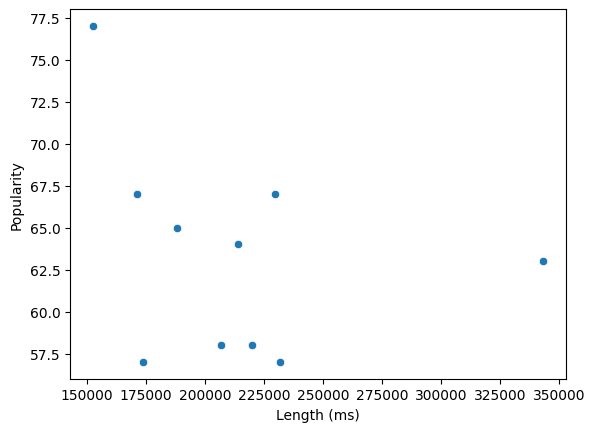

In [18]:
# Step 8: Analyze statistical relationship
import seaborn as sns

sns.scatterplot(data=df, x='Length (ms)', y='Popularity')